In [ ]:
import os, gzip, requests
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [ ]:
mnist_address = [
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/t10k-labels-idx1-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-images-idx3-ubyte.gz",
    "https://github.com/entropicemergence/tiny_llm_server/releases/download/v0.1.0/train-labels-idx1-ubyte.gz"
]

mnist_download_dir = "mnist"
os.makedirs(mnist_download_dir, exist_ok=True)
def download_mnist(url):
    for address in mnist_address:
        filename = address.split("/")[-1]
        filepath = os.path.join(mnist_download_dir, filename)
        if not os.path.exists(filepath):
            response = requests.get(address)
            with open(filepath, "wb") as f:
                f.write(response.content)
download_mnist(mnist_address)

In [ ]:
with gzip.open(("mnist/t10k-labels-idx1-ubyte.gz"), "rb") as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(("mnist/t10k-images-idx3-ubyte.gz"), "rb") as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open(("mnist/train-labels-idx1-ubyte.gz"), "rb") as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with gzip.open(("mnist/train-images-idx3-ubyte.gz"), "rb") as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)

np.set_printoptions(linewidth=np.inf)
np.set_printoptions(threshold=np.inf)

print (train_images.shape)
print (train_images[2])
print (train_labels[2])

fig, ax = plt.subplots(2, 5, figsize=(14, 7))
for i in range(10):
    ax[i//5, i%5].imshow(train_images[i], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {train_labels[i]}")
    # ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
train_images_scaled = (train_images / 255.0) - 0.5
# print (train_images_scaled[0])

scallar = 0.01
numpy_array = np.array([1, 2, 3, 4, 5])
print(scallar)
print (numpy_array)

numpy_matrix = np.array([[1, 2, 3], [4, 5, 6]])
print (numpy_matrix)


random_matrix = np.random.randn(2, 4)
print (random_matrix)




In [ ]:
def relu_activation (x):
    return np.maximum(0, x)

def sigmoid_activation (x):
    return 1 / (1 + np.exp(-x))

def neural_net_layer (input):
    output_size = 10
    input_size = 784
    weight = np.random.randn(input_size, output_size) * np.sqrt(2/input_size)
    bias = np.random.randn(output_size)
    output = np.dot(input, weight) + bias
    output = relu_activation(output)
    return output

input = np.random.randn(784)
output = neural_net_layer(input)
print (output)


x = np.linspace(-10, 3, 100)
y = relu_activation(x)
y2 = sigmoid_activation(x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()



In [ ]:
np.random.seed(42)

# Fully connected network

https://adamharley.com/nn_vis/mlp/3d.html

In [ ]:
np.random.seed(42)

class NeuralNetLayer:
    def __init__(self, input_size, output_size, enable_activation = True):
        self.weight = np.random.randn(output_size, input_size) * np.sqrt(2/input_size)
        self.bias = np.zeros(output_size)
        self.enable_activation = enable_activation

        self.input = None
        self.preactivation = None

        self.derivative_weight = np.zeros_like(self.weight)
        self.derivative_bias = np.zeros_like(self.bias)
    
    def activation_function (self, input):
        return np.maximum(0, input)

    def activation_function_derivative (self, input):
        return (input > 0).astype(float)


    def forward(self, input):
        self.input = input
        self.preactivation = np.dot(self.weight, self.input) + self.bias
        if self.enable_activation:
            return self.activation_function(self.preactivation)
        else:
            return self.preactivation
    
    
    def backward(self, grad_output):
        if self.enable_activation:
            derivative_preactivation = grad_output * self.activation_function_derivative(self.preactivation)
        else:
            derivative_preactivation = grad_output
        self.derivative_weight = np.outer(derivative_preactivation, self.input)
        self.derivative_bias = derivative_preactivation
        grad_input = np.dot(self.weight.T, derivative_preactivation)
        return grad_input
    
    def update_parameters(self, learning_rate):
        self.weight -= learning_rate * self.derivative_weight
        self.bias -= learning_rate * self.derivative_bias

        # print("sum of weight",np.sum(self.derivative_weight))
        # print("sum of bias",np.sum(self.derivative_bias))


class NeuralNet:
    def __init__(self):
        self.layers = []
        self.layers.append(NeuralNetLayer(784, 254, enable_activation=True))
        self.layers.append(NeuralNetLayer(254, 64, enable_activation=True))
        self.layers.append(NeuralNetLayer(64, 10, enable_activation=False))
    
    def softmax_function (self, input):
        scalled = input - np.max(input)
        exp = np.exp(scalled)
        return exp / np.sum(exp)
    
    def cross_entropy_loss (self, output, true_label):
        eps = 1e-10
        return -np.sum(true_label * np.log(output + eps))
    
    def forward(self, input):
        for layer in self.layers:
            input = layer.forward(input)
            # print ("layer",input)
        output = self.softmax_function(input)
        return output

    def backward(self, grad_output):
        for layer in reversed(self.layers):
            grad_output = layer.backward(grad_output)
            # print ("grad_output",grad_output)
    def update_parameters(self, learning_rate):
        for layer in self.layers:
            layer.update_parameters(learning_rate)




numpy_network = NeuralNet()

train_images_scaled = (train_images / 255.0) - 0.5
# print (train_images_scaled[0])
train_images_scalled_flatten = train_images_scaled.reshape(-1, 28*28)



training_loop = tqdm(range(train_images_scalled_flatten.shape[0]), desc="Training Neural Network")



loss_history = []
# for i in range(10):
for i in training_loop:
    # i = 1000
    output = numpy_network.forward(train_images_scalled_flatten[i])
    label = train_labels[i]
    true_label = np.zeros(10)
    true_label[label] = 1
    # print (label, true_label)
    error = output - true_label

    # print (error)

    # print (output)

    loss = numpy_network.cross_entropy_loss(output, true_label)
    loss_history.append(loss)
    # print (error.shape, output.shape)
    numpy_network.backward(error)
    numpy_network.update_parameters(learning_rate=0.01)
    # print (loss)
    training_loop.set_postfix(loss = f"{loss:.4f}")

# x1=np.arange(10)
# x = np.random.randint(0,10,size = 10 )
# x[5] = 15
# y = numpy_network.softmax_function(x)
# plt.scatter(x1, y*10)
# plt.scatter(x1, x)


Training Neural Network: 100%|██████████| 60000/60000 [01:25<00:00, 705.61it/s, loss=0.0018] 


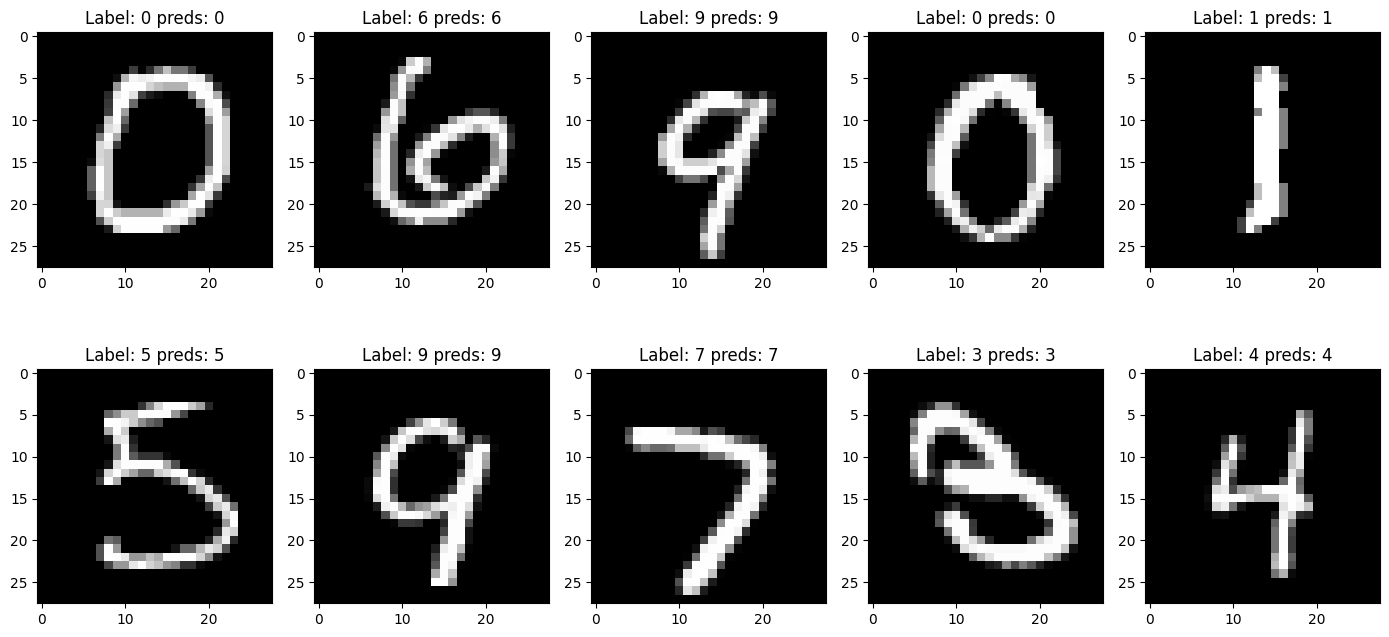

In [81]:
fig, ax = plt.subplots(2, 5, figsize=(14, 7))

test_images_scalled_flatten = ((test_images / 255.0) - 0.5).reshape(-1, 28*28)

for i in range(10):
    index = i+10
    output = numpy_network.forward(test_images_scalled_flatten[index])
    output = numpy_network.softmax_function(output)
    # print (output)
    # print (np.argmax(output))

    ax[i//5, i%5].imshow(test_images[index], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {test_labels[index]} preds: {np.argmax(output)}")
    # ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

In [73]:
# Eval 

test_images_scalled_flatten = ((test_images / 255.0) - 0.5).reshape(-1, 28*28)
correct = 0
incorrect = 0
for i in range(len(test_labels)):
    output = numpy_network.forward(test_images_scalled_flatten[i])
    preds = np.argmax(output)
    if preds == test_labels[i]:
        correct += 1
    else:
        incorrect += 1

print (correct, incorrect, "Accuracy: ", correct / (correct + incorrect))


9437 563 Accuracy:  0.9437


# Membuat Neural Network menggunakan pytorch

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

In [53]:
## Batch training

In [83]:
class TorchNet(nn.Module):
    def __init__(self):
        super(TorchNet, self).__init__()
        self.layers=nn.Sequential(
            nn.Linear(784, 254),
            nn.ReLU(),
            nn.Linear(254, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

print (train_images_scalled_flatten.shape)

batch_size = 10
train_images_scalled_flatten_batched = torch.from_numpy(train_images_scalled_flatten).float().view(-1, batch_size, 784)
train_labels_batched = torch.from_numpy(train_labels).long().view(-1, batch_size)
print (train_images_scalled_flatten_batched.shape)


torch_network = TorchNet()
optimizer = optim.SGD(torch_network.parameters(), lr=0.01)

# for j in range(10):
training_loop = tqdm(range(train_images_scalled_flatten_batched.shape[0]), desc="Training Neural Network")
for i in training_loop:
    output = torch_network(train_images_scalled_flatten_batched[i])
    label = train_labels_batched[i]
    loss = nn.functional.cross_entropy(output, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    training_loop.set_postfix(loss = f"{loss.item():.4f}")



(60000, 784)
torch.Size([6000, 10, 784])


Training Neural Network: 100%|██████████| 6000/6000 [00:09<00:00, 611.62it/s, loss=0.0597]


torch.Size([10])


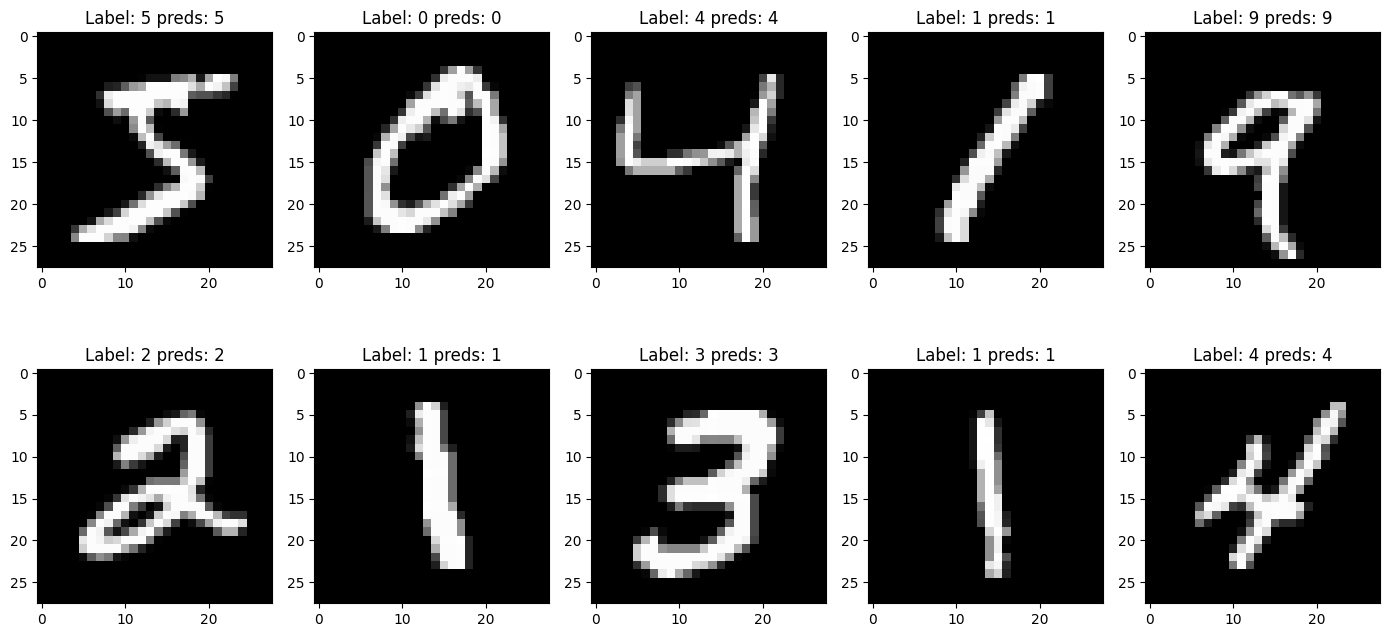

In [84]:
preds = torch_network(train_images_scalled_flatten_batched[0])
preds = torch.argmax(preds, dim=1)
print (preds.shape)

fig, ax = plt.subplots(2, 5, figsize=(14, 7))
for i in range(10):
    ax[i//5, i%5].imshow(train_images[i], cmap="gray")
    ax[i//5, i%5].set_title(f"Label: {train_labels[i]} preds: {preds[i]}")
plt.tight_layout()
plt.show()


In [85]:
print (test_images_scalled_flatten.shape)
preds = torch_network(torch.from_numpy(test_images_scalled_flatten).float())
preds = torch.argmax(preds, dim=1)
print (preds.shape)


correct = 0
incorrect = 0
for n in range (len(preds)):
    if preds[n] == test_labels[n]:
        correct += 1
    else:
        incorrect += 1

print (correct, incorrect, "Accuracy: ", correct / (correct + incorrect))


(10000, 784)
torch.Size([10000])
9065 935 Accuracy:  0.9065


# Convolutional Neural Network

https://adamharley.com/nn_vis/cnn/3d.html

In [86]:
class TorchConvNet(nn.Module):
    def __init__(self):
        super(TorchConvNet, self).__init__()
        self.layers=nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128*4*4, 10)
        )
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        # print (x.shape)
        return x

print (train_images_scalled_flatten.shape)

batch_size = 10
train_images_scalled_flatten_batched = torch.from_numpy(train_images_scalled_flatten).float().view(-1, batch_size, 1, 28, 28)
train_labels_batched = torch.from_numpy(train_labels).long().view(-1, batch_size)

print (train_images_scalled_flatten_batched.shape)


torch_conv_network = TorchConvNet()
optimizer = optim.SGD(torch_conv_network.parameters(), lr=0.01)

# output = torch_network(train_images_scalled_flatten_batched[0])

# for j in range(10):
training_loop = tqdm(range(train_images_scalled_flatten_batched.shape[0]), desc="Training Neural Network")
for i in training_loop:
    output = torch_conv_network(train_images_scalled_flatten_batched[i])
    label = train_labels_batched[i]
    loss = nn.functional.cross_entropy(output, label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    training_loop.set_postfix(loss = f"{loss.item():.4f}")



(60000, 784)
torch.Size([6000, 10, 1, 28, 28])


Training Neural Network:   0%|          | 0/6000 [00:00<?, ?it/s]

Training Neural Network: 100%|██████████| 6000/6000 [00:27<00:00, 215.08it/s, loss=0.0099]


In [89]:
print (test_images_scalled_flatten.shape)
preds = torch_conv_network(torch.from_numpy(test_images_scalled_flatten).float().view(-1, 1,28,28))
preds = torch.argmax(preds, dim=1)
print (preds.shape)

correct = 0
incorrect = 0
for n in range (len(preds)):
    if preds[n] == test_labels[n]:
        correct += 1
    else:
        incorrect += 1

print (correct, incorrect, "Accuracy: ", correct / (correct + incorrect))

(10000, 784)
torch.Size([10000])
9425 575 Accuracy:  0.9425
